In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api

In [12]:
df = pd.read_csv("/Users/ramya/pos_order_line.csv",error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10208 entries, 0 to 10207
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10208 non-null  int64  
 1   company_id           10208 non-null  int64  
 2   name                 10208 non-null  object 
 3   product_id           10208 non-null  int64  
 4   price_unit           10208 non-null  float64
 5   qty                  10208 non-null  float64
 6   price_subtotal       10208 non-null  float64
 7   price_subtotal_incl  10208 non-null  float64
 8   discount             10208 non-null  float64
 9   order_id             10208 non-null  int64  
 10  full_product_name    10208 non-null  object 
 11  create_uid           10208 non-null  int64  
 12  create_date          10208 non-null  object 
 13  write_uid            10208 non-null  int64  
 14  write_date           10208 non-null  object 
dtypes: float64(5), int64(6), object(4)
m

In [13]:
df.isnull().sum()
df.isna().sum()

id                     0
company_id             0
name                   0
product_id             0
price_unit             0
qty                    0
price_subtotal         0
price_subtotal_incl    0
discount               0
order_id               0
full_product_name      0
create_uid             0
create_date            0
write_uid              0
write_date             0
dtype: int64

In [14]:
df.describe()

,id,company_id,product_id,price_unit,qty,price_subtotal,price_subtotal_incl,discount,order_id,create_uid,write_uid
count,10208.000000,10208.0,10208.000000,10208.000000,10208.000000,10208.000000,10208.000000,10208.000000,10208.000000,10208.0,10208.0
mean,5109.497943,1.0,3535.662520,42.260934,1.752351,51.377068,51.377264,0.009796,1496.204741,2.0,2.0
std,2946.943671,0.0,2126.640078,67.921793,4.854944,82.477818,82.477733,0.699831,873.230539,0.0,0.0
min,1.000000,1.0,41.000000,0.000000,-4.000000,-320.000000,-320.000000,0.000000,1.000000,2.0,2.0
25%,2557.750000,1.0,1393.750000,10.000000,1.000000,15.000000,15.000000,0.000000,723.000000,2.0,2.0
50%,5109.500000,1.0,3219.000000,25.000000,1.000000,30.000000,30.000000,0.000000,1501.000000,2.0,2.0
75%,7661.250000,1.0,5522.000000,46.000000,1.000000,58.000000,58.000000,0.000000,2271.000000,2.0,2.0
max,10213.000000,1.0,7102.000000,1900.000000,400.000000,2500.000000,2500.000000,50.000000,3002.000000,2.0,2.0


In [15]:
df[["create_date","write_date"]]=df[["create_date","write_date"]].apply(pd.to_datetime)

In [16]:
df['month_year'] = df['create_date'].apply(lambda x: x.strftime('%Y-%m'))
df['daymonth_year'] = df['create_date'].apply(lambda x: x.strftime('%Y-%m-%d'))


In [17]:
df_temp = df.groupby('daymonth_year').sum()['price_subtotal_incl'].reset_index()

In [19]:
df_temp.tail(10)

,daymonth_year,price_subtotal_incl
127,2022-05-28,3085.0
128,2022-05-29,3694.0
129,2022-05-30,3401.0
130,2022-05-31,2260.0
131,2022-06-01,3474.0
132,2022-06-02,4491.0
133,2022-06-03,2901.0
134,2022-06-04,7771.5
135,2022-06-05,2614.5
136,2022-06-06,4028.0


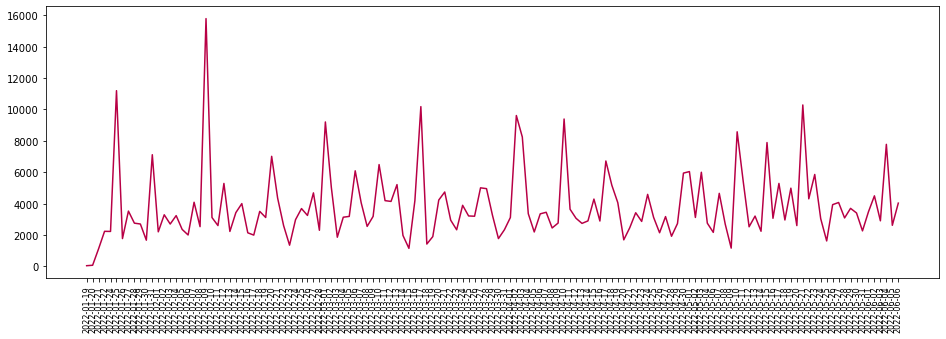

In [20]:
plt.figure(figsize=(16, 5))
plt.plot(df_temp['daymonth_year'], df_temp['price_subtotal_incl'], color='#b80045')
#plt.plot(df_temp['month_year'], df_temp['price_subtotal_incl'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [21]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   daymonth_year        137 non-null    object 
 1   price_subtotal_incl  137 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [22]:
df_temp= df_temp.set_index('daymonth_year')
#df_temp= df_temp.set_index('month_year')
df_temp.head(10) ##month year is now an index to convert to timeseries

,price_subtotal_incl
daymonth_year,
2022-01-19,42.00
2022-01-20,70.00
2022-01-21,1120.00
2022-01-22,2231.58
2022-01-24,2224.30
2022-01-25,11190.40
2022-01-26,1769.00
2022-01-27,3520.00
2022-01-28,2751.00


<AxesSubplot:xlabel='daymonth_year'>

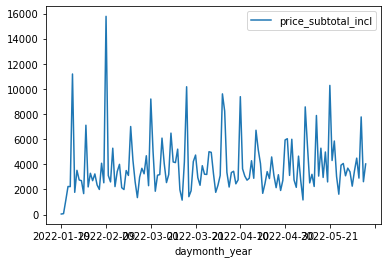

In [23]:
df_temp.plot()

In [24]:
df_temp.columns=['Sales'] #renaming column name as sales
df_temp.describe()

,Sales
count,137.000000
mean,3828.168686
std,2283.172992
min,42.000000
25%,2520.000000
50%,3182.000000
75%,4348.000000
max,15781.000000


In [25]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

        

In [26]:
adfuller_test(df_temp['Sales'])

ADF Test Statistic : -8.223959497399589
p-value : 6.319443142956132e-13
#Lags Used : 3
Number of Observations Used : 133
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [27]:
from pmdarima import auto_arima
#import warnings
#warnings.filterwarnings("ignore")

In [28]:
stepwise_fit = auto_arima(df_temp['Sales'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2517.937, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2510.716, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2512.490, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2512.578, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2692.758, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2515.117, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.157 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  137
Model:                        SARIMAX   Log Likelihood               -1253.358
Date:                Tue, 21 Jun 2022   AIC                           2510.716
Time:                        19:09:56   BIC                           2516.556
Sample:                             0   HQIC                          2513.089
                                - 137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3828.1687    282.225     13.564      0.000    3275.017    4381.320
sigma2      5.175e+06   4.59e+05     11.284      0.000    4.28e+06    6.07e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               288.78
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             2.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.arima.model import ARIMA
print(df_temp.shape)
train=df_temp.iloc[:-20]
test=df_temp.iloc[-20:]
print(train.shape,test.shape)

(137, 1)
(117, 1) (20, 1)


In [30]:
df_temp.tail()

,Sales
daymonth_year,
2022-06-02,4491.0
2022-06-03,2901.0
2022-06-04,7771.5
2022-06-05,2614.5
2022-06-06,4028.0


In [31]:

model=ARIMA(train['Sales'],order=(0,0,0))
model=model.fit()
model.summary()

/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  117
Model:                          ARIMA   Log Likelihood               -1072.888
Date:                Tue, 21 Jun 2022   AIC                           2149.777
Time:                        19:10:40   BIC                           2155.301
Sample:                             0   HQIC                          2152.020
                                - 117                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3787.3953    313.271     12.090      0.000    3173.395    4401.395
sigma2      5.401e+06   5.13e+05     10.524      0.000     4.4e+06    6.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               261.59
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             2.06
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start=len(train)
end=len(train)+len(test)-1
pred = model.predict(start=start,end=end,typ="levels")
print(pred)

117    3787.395276
118    3787.395276
119    3787.395276
120    3787.395276
121    3787.395276
122    3787.395276
123    3787.395276
124    3787.395276
125    3787.395276
126    3787.395276
127    3787.395276
128    3787.395276
129    3787.395276
130    3787.395276
131    3787.395276
132    3787.395276
133    3787.395276
134    3787.395276
135    3787.395276
136    3787.395276
Name: predicted_mean, dtype: float64


/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='daymonth_year'>

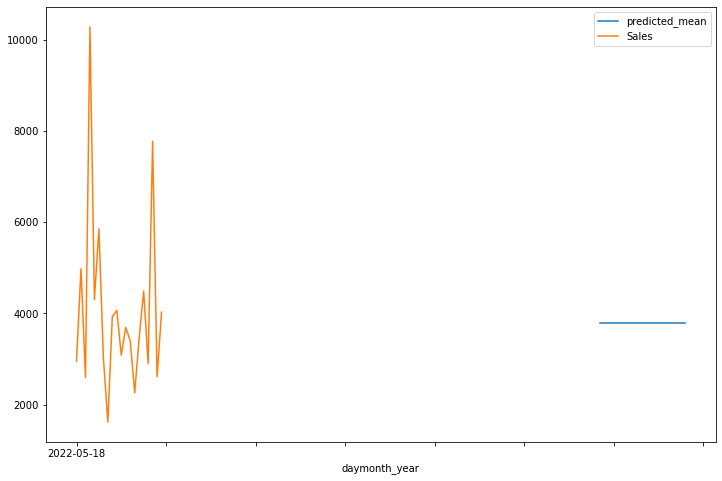

In [33]:
pred.plot(legend=True,figsize=(12,8))
test['Sales'].plot(legend=True,figsize=(12,8))

In [34]:
test['Sales'].mean()

4067.075

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Sales']))
print(rmse)

1965.4797645480044


In [36]:
model2=ARIMA(df_temp['Sales'],order=(0,0,0))
model2=model2.fit()
df_temp.tail()

/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,Sales
daymonth_year,
2022-06-02,4491.0
2022-06-03,2901.0
2022-06-04,7771.5
2022-06-05,2614.5
2022-06-06,4028.0


In [37]:
#index_future_dates=pd.date_range(start='2022-05-31',end='2022-06-30',freq='D')
pred2=model2.predict(start=len(df_temp),end=len(df_temp)+30,typ='levels').rename("ARIMA Predictions")
#pred2.index=index_future_dates
print(pred2)

137    3828.148335
138    3828.148335
139    3828.148335
140    3828.148335
141    3828.148335
142    3828.148335
143    3828.148335
144    3828.148335
145    3828.148335
146    3828.148335
147    3828.148335
148    3828.148335
149    3828.148335
150    3828.148335
151    3828.148335
152    3828.148335
153    3828.148335
154    3828.148335
155    3828.148335
156    3828.148335
157    3828.148335
158    3828.148335
159    3828.148335
160    3828.148335
161    3828.148335
162    3828.148335
163    3828.148335
164    3828.148335
165    3828.148335
166    3828.148335
167    3828.148335
Name: ARIMA Predictions, dtype: float64


/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='daymonth_year'>

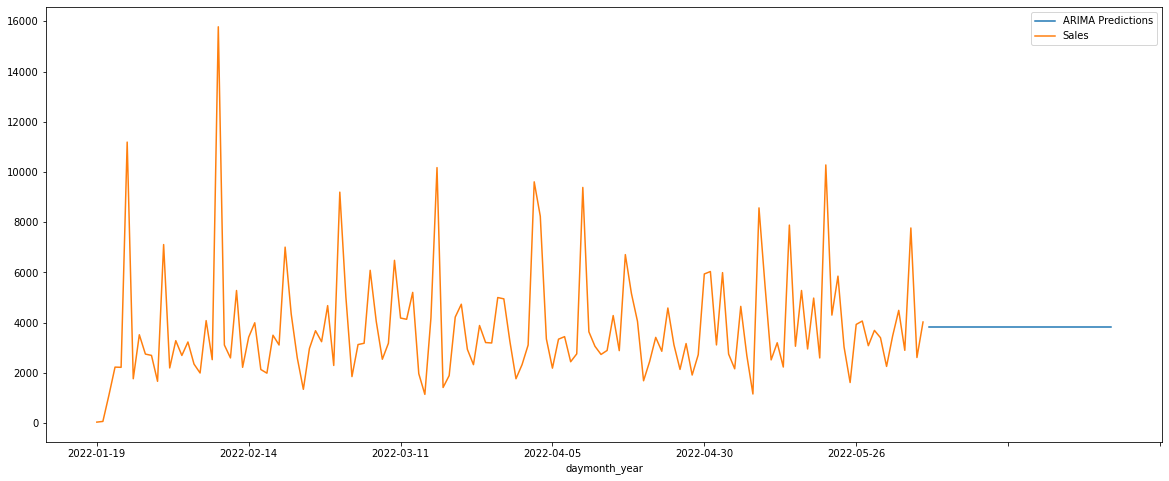

In [39]:
pred2.plot(legend=True,figsize=(12,8))
df_temp['Sales'].plot(legend=True,figsize=(20,8))